In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import configparser
from scipy import stats

In [2]:
# Read Config file
config = configparser.ConfigParser()
config.read('config.ini')
conn_str = 'Driver={SQL Server};Server=' + config['SQL_DATABASE']['SERVER'] + ';Database=' + config['SQL_DATABASE'][
    'DATABASE'] + ';Trusted_Connection=yes;'

In [3]:
# DB Connection
conn = pyodbc.connect(conn_str)

In [4]:
# Read Data
queryDF =pd.read_sql_query(config['SQL_QUERY']['QUERY'], conn)
print(queryDF.head())

   row_number                          order_id  \
0           1  cfcd208495d565ef66e7dff9f98764da   
1           2  c4ca4238a0b923820dcc509a6f75849b   
2           3  c81e728d9d4c2f636f067f89cc14862c   
3           4  eccbc87e4b5ce2fe28308fd9f2a7baf3   
4           5  a87ff679a2f3e71d9181a67b7542122c   

                            user_id                           page_id  \
0  c81e728d9d4c2f636f067f89cc14862c  6f4922f45568161a8cdf4ad2299f6d23   
1  eccbc87e4b5ce2fe28308fd9f2a7baf3  4e732ced3463d06de0ca9a15b6153677   
2  eccbc87e4b5ce2fe28308fd9f2a7baf3  5c45a86277b8bf17bff6011be5cfb1b9   
3  eccbc87e4b5ce2fe28308fd9f2a7baf3  fb339ad311d50a229e497085aad219c7   
4  eccbc87e4b5ce2fe28308fd9f2a7baf3  fb339ad311d50a229e497085aad219c7   

            product site_version                 time         title target  
0          sneakers      desktop  2019-01-11 09:24:43  banner_click      0  
1          sneakers      desktop  2019-01-09 09:38:51   banner_show      0  
2  sports_nutrition    

In [5]:
queryDF = queryDF.drop(['order_id','page_id'],axis=1)
print(queryDF.describe(include='all'))

         row_number                           user_id  product site_version  \
count   1000.000000                              1000     1000         1000   
unique          NaN                               330        5            2   
top             NaN  45c48cce2e2d7fbdea1afc51c7c6ad26  clothes       mobile   
freq            NaN                                17      223          766   
mean     500.500000                               NaN      NaN          NaN   
std      288.819436                               NaN      NaN          NaN   
min        1.000000                               NaN      NaN          NaN   
25%      250.750000                               NaN      NaN          NaN   
50%      500.500000                               NaN      NaN          NaN   
75%      750.250000                               NaN      NaN          NaN   
max     1000.000000                               NaN      NaN          NaN   

                       time        title target  
c

In [6]:
# Check missing values
queryDF.isnull().sum()

row_number      0
user_id         0
product         0
site_version    0
time            0
title           0
target          0
dtype: int64

In [7]:
# product, site_version and title columns have only 5, 2 and 3 unique values, so it is a good opportunity to change them to the category type
for col in ['product', 'site_version', 'title']:
    queryDF[col] = queryDF[col].astype('category')
print(queryDF.info(memory_usage = 'deep'))
queryDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   row_number    1000 non-null   int64   
 1   user_id       1000 non-null   object  
 2   product       1000 non-null   category
 3   site_version  1000 non-null   category
 4   time          1000 non-null   object  
 5   title         1000 non-null   category
 6   target        1000 non-null   object  
dtypes: category(3), int64(1), object(3)
memory usage: 233.5 KB
None


,row_number,user_id,product,site_version,time,title,target
0,1,c81e728d9d4c2f636f067f89cc14862c,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
1,2,eccbc87e4b5ce2fe28308fd9f2a7baf3,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,3,eccbc87e4b5ce2fe28308fd9f2a7baf3,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0
3,4,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:58:18,banner_show,0
4,5,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:59:15,banner_click,0


In [8]:
print('Products on banners: ', queryDF['product'].unique())

Products on banners:  [sneakers, sports_nutrition, company, accessories, clothes]
Categories (5, object): [sneakers, sports_nutrition, company, accessories, clothes]


In [9]:
print('Site versions: ', queryDF.site_version.unique())

Site versions:  [desktop, mobile]
Categories (2, object): [desktop, mobile]


In [10]:
print('Page events: ', queryDF.title.unique())

Page events:  [banner_click, banner_show, order]
Categories (3, object): [banner_click, banner_show, order]


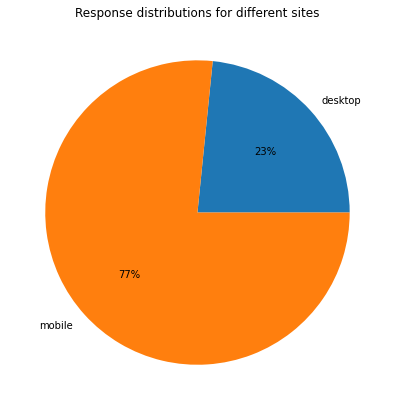

In [11]:
# Data Analysis

ax=queryDF.groupby(['site_version']).count()['target'].plot.pie(figsize=(7,7),autopct='%1.0f%%')
ax.set_ylabel('')
ax.set_title('Response distributions for different sites')
plt.show()

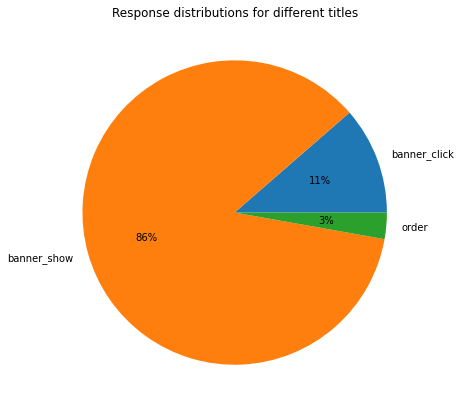

In [12]:
ax=queryDF.groupby(['title']).count()['target'].plot.pie(figsize=(7,7),autopct='%1.0f%%')
ax.set_ylabel('')
ax.set_title('Response distributions for different titles')
plt.show()

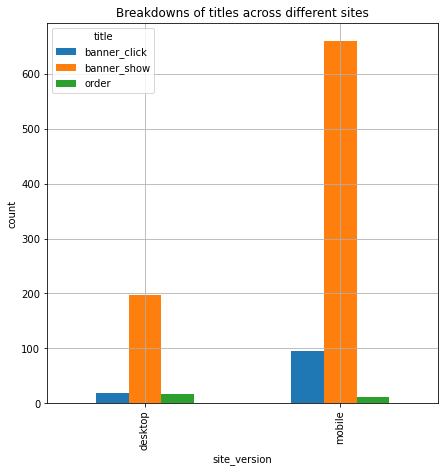

In [13]:
ax=queryDF.groupby(['site_version','title']).count()['target'].unstack('title').plot(kind='bar',figsize=(7,7),grid=True)
ax.set_ylabel('count')
ax.set_title('Breakdowns of titles across different sites')
plt.show()

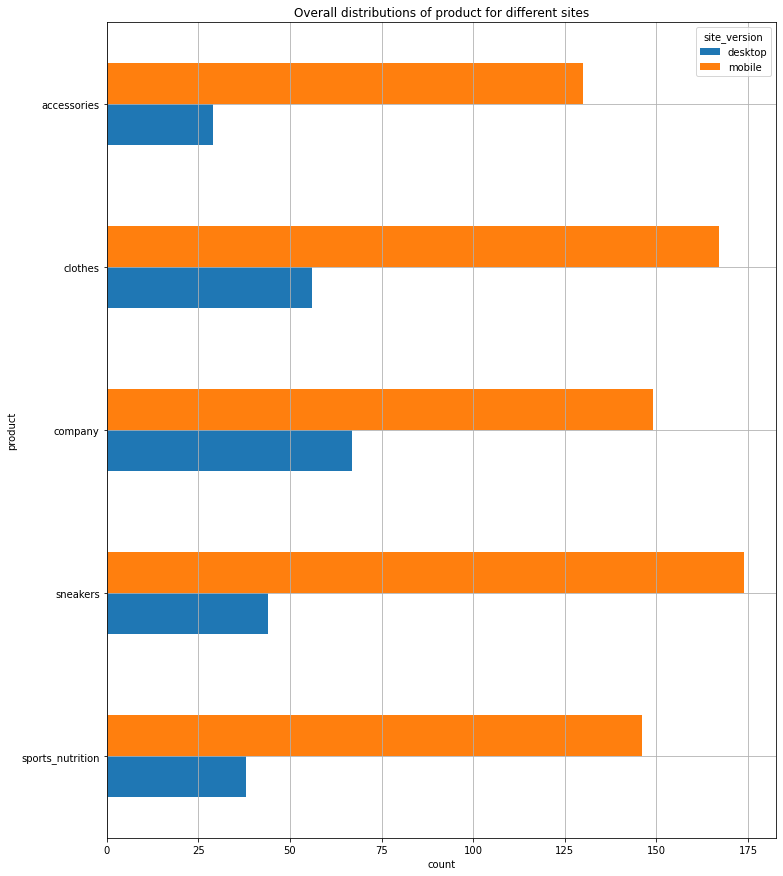

In [14]:
ax=queryDF.groupby(['product','site_version']).count()['target'].unstack('site_version').iloc[::-1].plot(kind='barh',figsize=(12,15),grid=True)
ax.set_ylabel('product')
ax.set_xlabel('count')
ax.set_title('Overall distributions of product for different sites')
plt.show()